# Isotype chart

Los datos usados en este notebook provienen del registro de animales domésticos por distritos de Madrid, que se pueden encontrar de forma pública en [este link](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=3e573d68ae8a6410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default).

Vamos a representar mediante un **isotype chart** el número de perros y gatos por cada distrito de Madrid.

### Carga de datos y ajuste de variables

In [1]:
import pandas as pd
data = pd.read_excel('datos/censo_animales.xlsx')

Cambio el nombre a las columnas para mejorar su accesibilidad:

In [2]:
data = data[["ESPECIE CANINA", "ESPECIE FELINA", "DISTRITO"]].rename(columns={"ESPECIE CANINA": "Perros", "ESPECIE FELINA": "Gatos", "DISTRITO": "Distrito"})

### Representación

Para lograr un isotype, utilizo la librería altair. Tras realizar varias pruebas, he decidido que cada emoji de gato/perro representará 3000 mascotas del tipo concreto.

In [3]:
import altair as alt

frecuencia = 3000 # Uso esta frecuencia para decidir cada cuantos animales se dibuja el emoji
data['Emojis_Perros'] = data.apply(lambda row: '🐶' * (row['Perros'] // frecuencia), axis=1)
data['Emojis_Gatos'] = data.apply(lambda row: '🐱' * (row['Gatos'] // frecuencia), axis=1)


emojis_data = pd.concat([data[['Distrito', 'Emojis_Perros']].rename(columns={'Emojis_Perros': 'Emojis'}),
                         data[['Distrito', 'Emojis_Gatos']].rename(columns={'Emojis_Gatos': 'Emojis'})])


chart = alt.Chart(emojis_data).mark_text(
    fontSize=20,
    align='left',
    baseline='middle',
    dx=-100
).encode(
    y='Distrito:N',
    text='Emojis:N'
).properties(
    width=200,
    height=400,
    title='Isotype Chart: Perros y gatos por distrito'
)

# Muestro tambien la frecuencia con la que se esta dibujando cada emoji
text = alt.Chart(pd.DataFrame({'x': [0], 'y': [0], 'text': [f'Cada emoji representa {frecuencia} mascotas']})).mark_text(
    align='left',
    baseline='middle',
    fontSize=12
).encode(
    x=alt.value(100),
    y=alt.value(420),
    text='text'
)

chart_with_text = (chart + text).configure_title(fontSize=14)
chart_with_text.show()


alt.LayerChart(...)

**Nota:** Parece que al subir a github este cuaderno, github no es capaz de renderizar el isotype chart producido con el código de arriba. Por ello, cargo aquí directamente la imagen. Si se quiere comprobar el funcionamiento del código, basta con ejecutar este cuaderno.

Isotype chart:

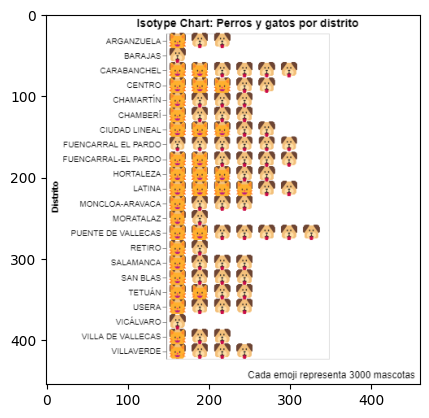

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('isotype.png')
imgplot = plt.imshow(img)
plt.show()